In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/New_Paper/merged_df (1).csv')

In [ ]:
# Define a regular expression pattern
pattern = r'^(.+)\((Former|Current) Employee\) - (.+), ([A-Z]{2}) - (.+)$'

# Filter the DataFrame to keep only rows where the "author" column matches the pattern
df_cleaned = df[df['author'].str.match(pattern, na=False)]

# Now df_cleaned contains only the rows with the required format in the "author" column
df_cleaned

,company,author,title,review,pros,rating
0,Dell-Technologies,"Advisor (Former Employee) - Nashville, TN - Oc...",Great place to start Career,Compensation is not top in industry but it's a...,NaN,4
1,Dell-Technologies,Small Business Advisor (Former Employee) - Rou...,Okay,Expectations were extremely high along with tr...,NaN,3
2,Dell-Technologies,"Sales (Current Employee) - Nashville, TN - Oct...",Productive and fun workplace,Lots of opportunities to make money and learn!...,NaN,4
3,Dell-Technologies,Technical Sales Representative (Current Employ...,Dell culture is in a slow decline.,I have been with Dell for 5 years working for ...,NaN,4
4,Dell-Technologies,"Business Manager, Data driven strategy (Forme...",Great environment and people to surround yours...,What is the best part of working at the compan...,NaN,5
...,...,...,...,...,...,...
250616,Salesforce,"Sales (Current Employee) - New York, NY - Octo...",Great job,Yes great person loved working here daily revi...,NaN,5
250618,Salesforce,Executive Assistant (Former Employee) - New Yo...,Ymmv,Your experience largely depends on the team yo...,NaN,4
250620,Salesforce,Senior Director (Former Employee) - San Franci...,It’s all about the people,"Good, smart, hardworking people who work at Sa...",NaN,5
250621,Salesforce,"Director of Systems, Customer Experience, Digi...","Overall, I did like my job and team at Salesfo...",What is the best part of working at the compan...,NaN,4


In [ ]:
#Dropping duplicates
df_cleaned = df_cleaned.drop_duplicates()

#Checking Dataframe
df_cleaned

,company,author,title,review,pros,rating
0,Dell-Technologies,"Advisor (Former Employee) - Nashville, TN - Oc...",Great place to start Career,Compensation is not top in industry but it's a...,NaN,4
1,Dell-Technologies,Small Business Advisor (Former Employee) - Rou...,Okay,Expectations were extremely high along with tr...,NaN,3
2,Dell-Technologies,"Sales (Current Employee) - Nashville, TN - Oct...",Productive and fun workplace,Lots of opportunities to make money and learn!...,NaN,4
3,Dell-Technologies,Technical Sales Representative (Current Employ...,Dell culture is in a slow decline.,I have been with Dell for 5 years working for ...,NaN,4
4,Dell-Technologies,"Business Manager, Data driven strategy (Forme...",Great environment and people to surround yours...,What is the best part of working at the compan...,NaN,5
...,...,...,...,...,...,...
249461,Salesforce,"Sales (Current Employee) - New York, NY - Octo...",Great job,Yes great person loved working here daily revi...,NaN,5
249463,Salesforce,Executive Assistant (Former Employee) - New Yo...,Ymmv,Your experience largely depends on the team yo...,NaN,4
249465,Salesforce,Senior Director (Former Employee) - San Franci...,It’s all about the people,"Good, smart, hardworking people who work at Sa...",NaN,5
249466,Salesforce,"Director of Systems, Customer Experience, Digi...","Overall, I did like my job and team at Salesfo...",What is the best part of working at the compan...,NaN,4


In [ ]:
# Define a regular expression pattern to extract the required information
pattern = r'(?P<position>.+) \((?P<employment_status>Former|Current) Employee\) - (?P<area>.+), (?P<state>[A-Z]{2}) - (?P<date>.+)'

# Extract the information and add it to the DataFrame
df_cleaned = df_cleaned.join(df_cleaned['author'].str.extract(pattern))

# Show the resulting DataFrame
df_cleaned[['position', 'employment_status', 'area', 'state', 'date']]

,position,employment_status,area,state,date
0,Advisor,Former,Nashville,TN,"October 31, 2023"
1,Small Business Advisor,Former,Round Rock,TX,"October 31, 2023"
2,Sales,Current,Nashville,TN,"October 30, 2023"
3,Technical Sales Representative,Current,Austin,TX,"October 30, 2023"
4,"Business Manager, Data driven strategy",Former,Nashville,TN,"October 24, 2023"
...,...,...,...,...,...
249461,Sales,Current,New York,NY,"October 6, 2023"
249463,Executive Assistant,Former,New York,NY,"September 14, 2023"
249465,Senior Director,Former,San Francisco,CA,"September 10, 2023"
249466,"Director of Systems, Customer Experience, Digi...",Former,Chicago,IL,"September 6, 2023"


In [ ]:
# Show the resulting DataFrame
df_cleaned

,company,author,title,review,pros,rating,position,employment_status,area,state,date
0,Dell-Technologies,"Advisor (Former Employee) - Nashville, TN - Oc...",Great place to start Career,Compensation is not top in industry but it's a...,NaN,4,Advisor,Former,Nashville,TN,"October 31, 2023"
1,Dell-Technologies,Small Business Advisor (Former Employee) - Rou...,Okay,Expectations were extremely high along with tr...,NaN,3,Small Business Advisor,Former,Round Rock,TX,"October 31, 2023"
2,Dell-Technologies,"Sales (Current Employee) - Nashville, TN - Oct...",Productive and fun workplace,Lots of opportunities to make money and learn!...,NaN,4,Sales,Current,Nashville,TN,"October 30, 2023"
3,Dell-Technologies,Technical Sales Representative (Current Employ...,Dell culture is in a slow decline.,I have been with Dell for 5 years working for ...,NaN,4,Technical Sales Representative,Current,Austin,TX,"October 30, 2023"
4,Dell-Technologies,"Business Manager, Data driven strategy (Forme...",Great environment and people to surround yours...,What is the best part of working at the compan...,NaN,5,"Business Manager, Data driven strategy",Former,Nashville,TN,"October 24, 2023"
...,...,...,...,...,...,...,...,...,...,...,...
249461,Salesforce,"Sales (Current Employee) - New York, NY - Octo...",Great job,Yes great person loved working here daily revi...,NaN,5,Sales,Current,New York,NY,"October 6, 2023"
249463,Salesforce,Executive Assistant (Former Employee) - New Yo...,Ymmv,Your experience largely depends on the team yo...,NaN,4,Executive Assistant,Former,New York,NY,"September 14, 2023"
249465,Salesforce,Senior Director (Former Employee) - San Franci...,It’s all about the people,"Good, smart, hardworking people who work at Sa...",NaN,5,Senior Director,Former,San Francisco,CA,"September 10, 2023"
249466,Salesforce,"Director of Systems, Customer Experience, Digi...","Overall, I did like my job and team at Salesfo...",What is the best part of working at the compan...,NaN,4,"Director of Systems, Customer Experience, Digi...",Former,Chicago,IL,"September 6, 2023"


In [ ]:
#Checking for Irrelevant columns
invalid_employment_status = ~df_cleaned['employment_status'].isin(['Former', 'Current'])
print(df_cleaned[invalid_employment_status])

#Empty DataFrame showing that in column 'employment_status' there is only Former or Current. So, all is fine.

Empty DataFrame
Columns: [company, author, title, review, pros, rating, position, employment_status, area, state, date]
Index: []


In [ ]:
# List of valid US state abbreviations
valid_states = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE',
                'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY', 'DC']
invalid_states = ~df_cleaned['state'].isin(valid_states)
print(df_cleaned[invalid_states])
#It seems there are 217 rows with different states

                       company  \
80           Dell-Technologies   
240          Dell-Technologies   
251          Dell-Technologies   
347          Dell-Technologies   
407          Dell-Technologies   
...                        ...   
243712  Cisco-Systems-582836a8   
243747  Cisco-Systems-582836a8   
244227  Cisco-Systems-582836a8   
248241                      HP   
249119              Salesforce   

                                                   author  \
80      Procurement Manager (Former Employee) - Singap...   
240     DevOps Engineer (Current Employee) - Singapur,...   
251     Software Engineer (Former Employee) - Brasilia...   
347     Intern (Former Employee) - Singapur, PR - June...   
407     Technical Support Engineer  (Current Employee)...   
...                                                   ...   
243712  Sales Administrative Assistant (Current Employ...   
243747  ISP Core network administrator (Current Employ...   
244227  Marketing Manager Caribbean (Forme

In [ ]:
# Create a mask for invalid state values
invalid_state_mask = ~df_cleaned['state'].isin(valid_states)

# Use the mask to retrieve the "state" column values for rows with invalid state values
invalid_states = df_cleaned.loc[invalid_state_mask, 'state'].unique()

# Display the unique invalid state abbreviations
print(invalid_states)

['PR' 'VI' 'US' 'LK' 'ON' 'BC' 'NL' 'UK' 'PL' 'MX' 'CR' 'GY' 'RU' 'NS'
 'DF' 'KA' 'MH' 'SJ' 'SF' 'AN']


In [ ]:
# Filter the DataFrame to keep only rows with valid state values
df_cleaned = df_cleaned[df_cleaned['state'].isin(valid_states)]

# Now df_cleaned contains only the rows with valid U.S. states and D.C.

#Checking if there are any other different states in dataset
# List of valid US state abbreviations
valid_states = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE',
                'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY', 'DC']
invalid_states = ~df_cleaned['state'].isin(valid_states)
print(df_cleaned[invalid_states])
#It seems there are 217 rows with different states

Empty DataFrame
Columns: [company, author, title, review, pros, rating, position, employment_status, area, state, date]
Index: []


In [ ]:
#Checking for date column
# Attempt to convert the 'date' column to datetime
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'], errors='coerce')

# Find rows where the date conversion resulted in NaT
invalid_dates = df_cleaned['date'].isna()
print(df_cleaned[invalid_dates])

                               company  \
1544                 Dell-Technologies   
91467   Cognizant-Technology-Solutions   
142475                           Adobe   
156784                           Apple   
179644                      Amazon.com   
189545                      Amazon.com   
216407                       Microsoft   
222768                             IBM   
227705                             IBM   
238763                          Oracle   

                                                   author  \
1544    Analista de Aplicacao (Current Employee) - Aus...   
91467   Claims Processing Specialist (Former Employee)...   
142475  Director, Technology and Programs (Current Emp...   
156784  AppkeCare Technical Advisor (Former Employee) ...   
179644  Associate (Current Employee) - Fort Worth, TX ...   
189545  Customer Service Representative, Phase 2 (Form...   
216407  Instructional Designer (Former Employee) - Iss...   
222768  Practice Executive (Former Employee) - Ci

<ipython-input-11-5ed19c28234d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['date'] = pd.to_datetime(df_cleaned['date'], errors='coerce')


In [ ]:
# Count the number of NaT observations in the 'date' column
num_nat = df_cleaned['date'].isna().sum()
print("Number of NaT observations:", num_nat)

# Remove rows where the 'date' column is NaT
df_cleaned = df_cleaned.dropna(subset=['date'])

Number of NaT observations: 10


In [ ]:
# Check the earliest and latest dates in the 'date' column
start_date = df_cleaned['date'].min()
end_date = df_cleaned['date'].max()
print("Earliest date:", start_date)
print("Latest date:", end_date)

Earliest date: 2011-01-28 00:00:00
Latest date: 2023-10-31 00:00:00


In [ ]:
# Extract the year from the 'date' column
df_cleaned['year'] = df_cleaned['date'].dt.year

# Count the number of observations for each year
year_counts = df_cleaned['year'].value_counts().sort_index()
print(year_counts)

2011       49
2012     3126
2013     4700
2014     5161
2015     5615
2016     6324
2017    13595
2018    15637
2019    13475
2020     8302
2021     6015
2022     6547
2023     4049
Name: year, dtype: int64


<ipython-input-14-e857225ad5a2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['year'] = df_cleaned['date'].dt.year


In [ ]:
# Converting the 'position' column to string type and then standardizing the position titles
df_cleaned['position'] = df_cleaned['position'].astype(str).str.lower().str.strip()
df_cleaned

<ipython-input-15-346f3532f4ae>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['position'] = df_cleaned['position'].astype(str).str.lower().str.strip()


,company,author,title,review,pros,rating,position,employment_status,area,state,date,year
0,Dell-Technologies,"Advisor (Former Employee) - Nashville, TN - Oc...",Great place to start Career,Compensation is not top in industry but it's a...,NaN,4,advisor,Former,Nashville,TN,2023-10-31,2023
1,Dell-Technologies,Small Business Advisor (Former Employee) - Rou...,Okay,Expectations were extremely high along with tr...,NaN,3,small business advisor,Former,Round Rock,TX,2023-10-31,2023
2,Dell-Technologies,"Sales (Current Employee) - Nashville, TN - Oct...",Productive and fun workplace,Lots of opportunities to make money and learn!...,NaN,4,sales,Current,Nashville,TN,2023-10-30,2023
3,Dell-Technologies,Technical Sales Representative (Current Employ...,Dell culture is in a slow decline.,I have been with Dell for 5 years working for ...,NaN,4,technical sales representative,Current,Austin,TX,2023-10-30,2023
4,Dell-Technologies,"Business Manager, Data driven strategy (Forme...",Great environment and people to surround yours...,What is the best part of working at the compan...,NaN,5,"business manager, data driven strategy",Former,Nashville,TN,2023-10-24,2023
...,...,...,...,...,...,...,...,...,...,...,...,...
249461,Salesforce,"Sales (Current Employee) - New York, NY - Octo...",Great job,Yes great person loved working here daily revi...,NaN,5,sales,Current,New York,NY,2023-10-06,2023
249463,Salesforce,Executive Assistant (Former Employee) - New Yo...,Ymmv,Your experience largely depends on the team yo...,NaN,4,executive assistant,Former,New York,NY,2023-09-14,2023
249465,Salesforce,Senior Director (Former Employee) - San Franci...,It’s all about the people,"Good, smart, hardworking people who work at Sa...",NaN,5,senior director,Former,San Francisco,CA,2023-09-10,2023
249466,Salesforce,"Director of Systems, Customer Experience, Digi...","Overall, I did like my job and team at Salesfo...",What is the best part of working at the compan...,NaN,4,"director of systems, customer experience, digi...",Former,Chicago,IL,2023-09-06,2023


In [ ]:
##WORKING ON POSITION

# Count the frequencies of each unique position
position_frequencies = df_cleaned['position'].value_counts()

#Download them to see the positions manually
position_frequencies.to_csv('position_frequencies.csv')

#View frequencies
position_frequencies

sales associate                                                     2630
associate                                                           1588
customer service representative                                     1405
sales consultant                                                    1202
delivery driver                                                      971
                                                                    ... 
customer enrichment rep, account development rep                       1
prepcook,  linecook                                                    1
decision support manager                                               1
google ad team                                                         1
director of systems, customer experience, digital transformation       1
Name: position, Length: 35063, dtype: int64

In [ ]:
# Define lists of position titles and keywords for each category
# Define lists of position titles and keywords for each category
entry_level_positions = ['intern', 'junior developer', 'associate engineer', 'technical assistant', 'administrative assistant', 'customer service'
                         'sales consultant', 'customer service specialist', 'merchandiser', 'material handler', 'warehouse worker']
entry_level_keywords = ['junior', 'intern', 'associate', 'assistant', 'entry-level', 'sales', 'it specialist', 'specialist', 'administrator','engineer',
                        'representative','technician', 'trainer', 'agent', 'jr.', 'developer']

managerial_positions = ['project manager', 'team lead', 'supervisor', 'senior developer', 'senior analyst',
                        'specialist']
managerial_keywords = ['manager', 'supervisor', 'lead', 'head', 'coordinator', 'senior', 'sr.']

executive_positions = ['chief executive officer (ceo)', 'chief information officer (cio)', 'director', 'vice president (vp)', 'president',
                       'senior technical staff', 'managing consultant']
executive_keywords = ['chief', 'director', 'vice president', 'executive', 'president', 'ceo', 'cio', 'coo', 'cfo']


# Function to categorize positions
def categorize_position(position):
    for keyword in entry_level_keywords:
        if keyword in position:
            return 'Entry Level'
    for keyword in managerial_keywords:
        if keyword in position:
            return 'Managerial Level'
    for keyword in executive_keywords:
        if keyword in position:
            return 'Executive Level'
    if position in entry_level_positions:
        return 'Entry Level'
    elif position in managerial_positions:
        return 'Managerial Level'
    elif position in executive_positions:
        return 'Executive Level'
    else:
        return 'Other'

# Apply the function to categorize positions
df_cleaned['position_category'] = df_cleaned['position'].apply(categorize_position)

In [ ]:
# Show the result
df_cleaned

,company,author,title,review,pros,rating,position,employment_status,area,state,date,year,position_category
0,Dell-Technologies,"Advisor (Former Employee) - Nashville, TN - Oc...",Great place to start Career,Compensation is not top in industry but it's a...,NaN,4,advisor,Former,Nashville,TN,2023-10-31,2023,Other
1,Dell-Technologies,Small Business Advisor (Former Employee) - Rou...,Okay,Expectations were extremely high along with tr...,NaN,3,small business advisor,Former,Round Rock,TX,2023-10-31,2023,Other
2,Dell-Technologies,"Sales (Current Employee) - Nashville, TN - Oct...",Productive and fun workplace,Lots of opportunities to make money and learn!...,NaN,4,sales,Current,Nashville,TN,2023-10-30,2023,Entry Level
3,Dell-Technologies,Technical Sales Representative (Current Employ...,Dell culture is in a slow decline.,I have been with Dell for 5 years working for ...,NaN,4,technical sales representative,Current,Austin,TX,2023-10-30,2023,Entry Level
4,Dell-Technologies,"Business Manager, Data driven strategy (Forme...",Great environment and people to surround yours...,What is the best part of working at the compan...,NaN,5,"business manager, data driven strategy",Former,Nashville,TN,2023-10-24,2023,Managerial Level
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249461,Salesforce,"Sales (Current Employee) - New York, NY - Octo...",Great job,Yes great person loved working here daily revi...,NaN,5,sales,Current,New York,NY,2023-10-06,2023,Entry Level
249463,Salesforce,Executive Assistant (Former Employee) - New Yo...,Ymmv,Your experience largely depends on the team yo...,NaN,4,executive assistant,Former,New York,NY,2023-09-14,2023,Entry Level
249465,Salesforce,Senior Director (Former Employee) - San Franci...,It’s all about the people,"Good, smart, hardworking people who work at Sa...",NaN,5,senior director,Former,San Francisco,CA,2023-09-10,2023,Managerial Level
249466,Salesforce,"Director of Systems, Customer Experience, Digi...","Overall, I did like my job and team at Salesfo...",What is the best part of working at the compan...,NaN,4,"director of systems, customer experience, digi...",Former,Chicago,IL,2023-09-06,2023,Executive Level


In [ ]:
# Count the number of occurrences of each position category
position_category_counts = df_cleaned['position_category'].value_counts()
position_category_counts

Entry Level         49827
Other               25944
Managerial Level    15501
Executive Level      1323
Name: position_category, dtype: int64

In [ ]:
# Filter out rows where the position category is "Other"
df_filtered = df_cleaned[df_cleaned['position_category'] != 'Other']

df_filtered
#66651 observations left

,company,author,title,review,pros,rating,position,employment_status,area,state,date,year,position_category
2,Dell-Technologies,"Sales (Current Employee) - Nashville, TN - Oct...",Productive and fun workplace,Lots of opportunities to make money and learn!...,NaN,4,sales,Current,Nashville,TN,2023-10-30,2023,Entry Level
3,Dell-Technologies,Technical Sales Representative (Current Employ...,Dell culture is in a slow decline.,I have been with Dell for 5 years working for ...,NaN,4,technical sales representative,Current,Austin,TX,2023-10-30,2023,Entry Level
4,Dell-Technologies,"Business Manager, Data driven strategy (Forme...",Great environment and people to surround yours...,What is the best part of working at the compan...,NaN,5,"business manager, data driven strategy",Former,Nashville,TN,2023-10-24,2023,Managerial Level
6,Dell-Technologies,"Sales Manager (Former Employee) - Round Rock, ...",Outdated Mentality!!!,They are currently in the process of replacing...,NaN,2,sales manager,Former,Round Rock,TX,2023-10-18,2023,Entry Level
10,Dell-Technologies,Software Sales Specialist (Former Employee) - ...,Could be great,"Fun atmosphere, great management and culture. ...",NaN,4,software sales specialist,Former,Nashville,TN,2023-10-14,2023,Entry Level
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249461,Salesforce,"Sales (Current Employee) - New York, NY - Octo...",Great job,Yes great person loved working here daily revi...,NaN,5,sales,Current,New York,NY,2023-10-06,2023,Entry Level
249463,Salesforce,Executive Assistant (Former Employee) - New Yo...,Ymmv,Your experience largely depends on the team yo...,NaN,4,executive assistant,Former,New York,NY,2023-09-14,2023,Entry Level
249465,Salesforce,Senior Director (Former Employee) - San Franci...,It’s all about the people,"Good, smart, hardworking people who work at Sa...",NaN,5,senior director,Former,San Francisco,CA,2023-09-10,2023,Managerial Level
249466,Salesforce,"Director of Systems, Customer Experience, Digi...","Overall, I did like my job and team at Salesfo...",What is the best part of working at the compan...,NaN,4,"director of systems, customer experience, digi...",Former,Chicago,IL,2023-09-06,2023,Executive Level


In [ ]:
# Check the sum of observations by year
observations_by_year = df_filtered['year'].value_counts().sort_index()
print(observations_by_year)

2011       32
2012     2382
2013     3586
2014     3894
2015     4226
2016     4728
2017    10117
2018    11740
2019     9542
2020     5407
2021     3950
2022     4225
2023     2822
Name: year, dtype: int64


In [ ]:
#Dropping year 2011 as there are only 32 observations in that year.
df_filtered = df_filtered[df_filtered['year'] != 2011]
observations_by_year = df_filtered['year'].value_counts().sort_index()
print(observations_by_year)

2012     2382
2013     3586
2014     3894
2015     4226
2016     4728
2017    10117
2018    11740
2019     9542
2020     5407
2021     3950
2022     4225
2023     2822
Name: year, dtype: int64


<ipython-input-23-500be14e1a7c>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='count', y='position', hue='position_category', data=top_positions, ci=None)


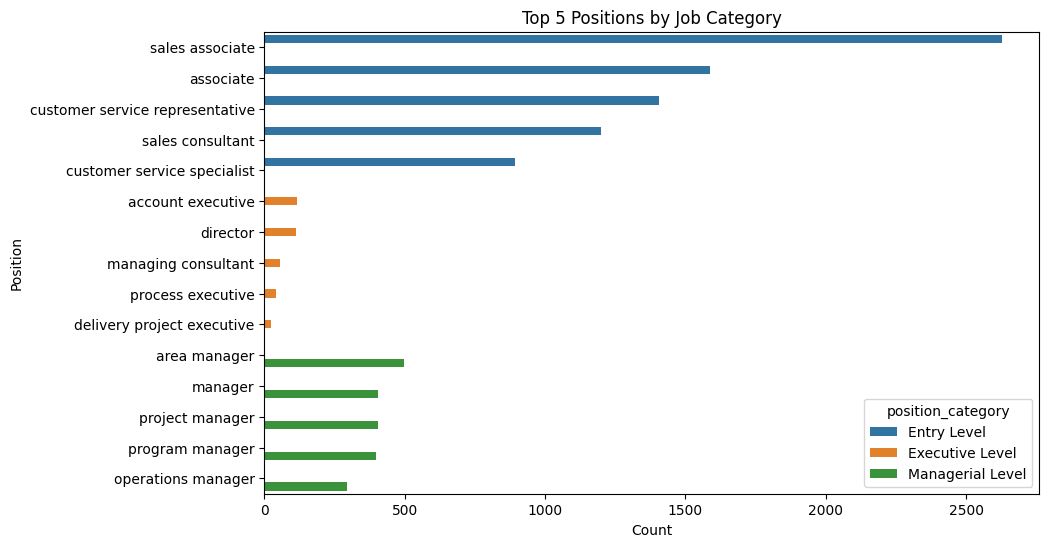

In [ ]:
#Finding the top most position
import seaborn as sns
import matplotlib.pyplot as plt

position_frequencies = df_filtered.groupby(['position_category', 'position']).size().reset_index(name='count')
top_positions = position_frequencies.groupby('position_category').apply(lambda x: x.nlargest(5, 'count')).reset_index(drop=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='position', hue='position_category', data=top_positions, ci=None)
plt.title('Top 5 Positions by Job Category')
plt.xlabel('Count')
plt.ylabel('Position')
plt.show()

In [ ]:
# Check the sum of observations by company
observations_by_company = df_filtered['company'].value_counts().sort_index()
print(observations_by_company)

Adobe                               242
Alphabet                              1
Amazon.com                        13504
Apple                              5353
Best-Buy                          22885
Cisco-Systems-582836a8             2730
Cognizant-Technology-Solutions     2088
Dell-Technologies                  3762
Google                             1405
HP                                   15
IBM                                6374
Intel-Corporation                  2191
Meta-dd1502f2                         7
Microsoft                          3070
Nvidia                               13
Oracle                             1585
Qualcomm                            867
SAP                                  56
Salesforce                          348
Servicenow                          123
Name: company, dtype: int64


In [ ]:
# Calculate the review count for each company
company_review_counts = df_filtered['company'].value_counts()

# Filter out companies with fewer than 100 reviews
companies_to_keep = company_review_counts[company_review_counts >= 100].index

# Filter the dataframe
df_filtered = df_filtered[df_filtered['company'].isin(companies_to_keep)]

In [ ]:
# Calculate the review count for each company again
company_review_counts = df_filtered['company'].value_counts()
company_review_counts

Best-Buy                          22885
Amazon.com                        13504
IBM                                6374
Apple                              5353
Dell-Technologies                  3762
Microsoft                          3070
Cisco-Systems-582836a8             2730
Intel-Corporation                  2191
Cognizant-Technology-Solutions     2088
Oracle                             1585
Google                             1405
Qualcomm                            867
Salesforce                          348
Adobe                               242
Servicenow                          123
Name: company, dtype: int64

In [ ]:
#Correcting company names
# Create a mapping dictionary
company_name_mapping = {
    'Best-Buy': 'Best Buy',
    'Amazon.com': 'Amazon',
    'IBM': 'IBM',
    'Apple': 'Apple',
    'Dell-Technologies': 'Dell Technologies',
    'Microsoft': 'Microsoft',
    'Cisco-Systems-582836a8': 'Cisco Systems',
    'Intel-Corporation': 'Intel Corporation',
    'Cognizant-Technology-Solutions': 'Cognizant Technology Solutions',
    'Oracle': 'Oracle',
    'Google': 'Google',
    'Qualcomm': 'Qualcomm',
    'Salesforce': 'Salesforce',
    'Adobe': 'Adobe',
    'Servicenow': 'ServiceNow'
}

# Replace company names in the dataframe
df_filtered['company'] = df_cleaned['company'].replace(company_name_mapping)
df_filtered

<ipython-input-27-37e7bdb76cec>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['company'] = df_cleaned['company'].replace(company_name_mapping)


,company,author,title,review,pros,rating,position,employment_status,area,state,date,year,position_category
2,Dell Technologies,"Sales (Current Employee) - Nashville, TN - Oct...",Productive and fun workplace,Lots of opportunities to make money and learn!...,NaN,4,sales,Current,Nashville,TN,2023-10-30,2023,Entry Level
3,Dell Technologies,Technical Sales Representative (Current Employ...,Dell culture is in a slow decline.,I have been with Dell for 5 years working for ...,NaN,4,technical sales representative,Current,Austin,TX,2023-10-30,2023,Entry Level
4,Dell Technologies,"Business Manager, Data driven strategy (Forme...",Great environment and people to surround yours...,What is the best part of working at the compan...,NaN,5,"business manager, data driven strategy",Former,Nashville,TN,2023-10-24,2023,Managerial Level
6,Dell Technologies,"Sales Manager (Former Employee) - Round Rock, ...",Outdated Mentality!!!,They are currently in the process of replacing...,NaN,2,sales manager,Former,Round Rock,TX,2023-10-18,2023,Entry Level
10,Dell Technologies,Software Sales Specialist (Former Employee) - ...,Could be great,"Fun atmosphere, great management and culture. ...",NaN,4,software sales specialist,Former,Nashville,TN,2023-10-14,2023,Entry Level
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249461,Salesforce,"Sales (Current Employee) - New York, NY - Octo...",Great job,Yes great person loved working here daily revi...,NaN,5,sales,Current,New York,NY,2023-10-06,2023,Entry Level
249463,Salesforce,Executive Assistant (Former Employee) - New Yo...,Ymmv,Your experience largely depends on the team yo...,NaN,4,executive assistant,Former,New York,NY,2023-09-14,2023,Entry Level
249465,Salesforce,Senior Director (Former Employee) - San Franci...,It’s all about the people,"Good, smart, hardworking people who work at Sa...",NaN,5,senior director,Former,San Francisco,CA,2023-09-10,2023,Managerial Level
249466,Salesforce,"Director of Systems, Customer Experience, Digi...","Overall, I did like my job and team at Salesfo...",What is the best part of working at the compan...,NaN,4,"director of systems, customer experience, digi...",Former,Chicago,IL,2023-09-06,2023,Executive Level


In [ ]:
#Dropping column author and area
df_filtered = df_filtered.drop(columns=['author', 'area'])
df_filtered

,company,title,review,pros,rating,position,employment_status,state,date,year,position_category
2,Dell Technologies,Productive and fun workplace,Lots of opportunities to make money and learn!...,NaN,4,sales,Current,TN,2023-10-30,2023,Entry Level
3,Dell Technologies,Dell culture is in a slow decline.,I have been with Dell for 5 years working for ...,NaN,4,technical sales representative,Current,TX,2023-10-30,2023,Entry Level
4,Dell Technologies,Great environment and people to surround yours...,What is the best part of working at the compan...,NaN,5,"business manager, data driven strategy",Former,TN,2023-10-24,2023,Managerial Level
6,Dell Technologies,Outdated Mentality!!!,They are currently in the process of replacing...,NaN,2,sales manager,Former,TX,2023-10-18,2023,Entry Level
10,Dell Technologies,Could be great,"Fun atmosphere, great management and culture. ...",NaN,4,software sales specialist,Former,TN,2023-10-14,2023,Entry Level
...,...,...,...,...,...,...,...,...,...,...,...
249461,Salesforce,Great job,Yes great person loved working here daily revi...,NaN,5,sales,Current,NY,2023-10-06,2023,Entry Level
249463,Salesforce,Ymmv,Your experience largely depends on the team yo...,NaN,4,executive assistant,Former,NY,2023-09-14,2023,Entry Level
249465,Salesforce,It’s all about the people,"Good, smart, hardworking people who work at Sa...",NaN,5,senior director,Former,CA,2023-09-10,2023,Managerial Level
249466,Salesforce,"Overall, I did like my job and team at Salesfo...",What is the best part of working at the compan...,NaN,4,"director of systems, customer experience, digi...",Former,IL,2023-09-06,2023,Executive Level


In [ ]:
# Install necessary packages
!pip install geopandas plotly

# Import libraries
import geopandas as gpd
import plotly.express as px
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Get US states map
us_states = gpd.read_file('https://www2.census.gov/geo/tiger/GENZ2021/shp/cb_2021_us_state_20m.zip')

# Ensure state codes in your data match the geo data
print(df_filtered['state'].unique())  # Check the unique state codes in your data
print(us_states['STUSPS'].unique())   # Check the unique state codes in the geo data

# Summarize review counts by state
review_counts = df_filtered['state'].value_counts().reset_index()
review_counts.columns = ['state', 'reviews']

# Check for any NaN values
print(review_counts.isnull().sum())

# Merge your data with the US states map
merged_data = us_states.set_index('STUSPS').join(review_counts.set_index('state'))

# Check the merged data
print(merged_data[['reviews']].isnull().sum())  # Check for NaNs in the reviews column

# If there are NaNs, you may want to fill them with zeros
merged_data['reviews'] = merged_data['reviews'].fillna(0)

['TN' 'TX' 'FL' 'CA' 'MA' 'OK' 'IL' 'GA' 'MI' 'PA' 'NY' 'IA' 'AZ' 'DC'
 'MN' 'WA' 'OH' 'NC' 'UT' 'ME' 'NH' 'IN' 'VA' 'MO' 'KS' 'NE' 'ID' 'NJ'
 'WI' 'AR' 'SC' 'CO' 'KY' 'NV' 'AL' 'CT' 'DE' 'MD' 'MS' 'OR' 'LA' 'RI'
 'WV' 'HI' 'NM' 'WY' 'AK' 'VT' 'SD' 'ND' 'MT']
['LA' 'AK' 'MD' 'WI' 'FL' 'GA' 'TN' 'MN' 'IA' 'MO' 'MI' 'ID' 'CA' 'CT'
 'TX' 'VA' 'NY' 'IL' 'MT' 'KY' 'OR' 'DC' 'OH' 'AR' 'WA' 'PR' 'WY' 'ME'
 'NM' 'UT' 'WV' 'KS' 'NV' 'MS' 'NH' 'AL' 'SD' 'PA' 'OK' 'NC' 'MA' 'ND'
 'DE' 'CO' 'SC' 'HI' 'VT' 'RI' 'IN' 'NJ' 'AZ' 'NE']
state      0
reviews    0
dtype: int64
reviews    1
dtype: int64


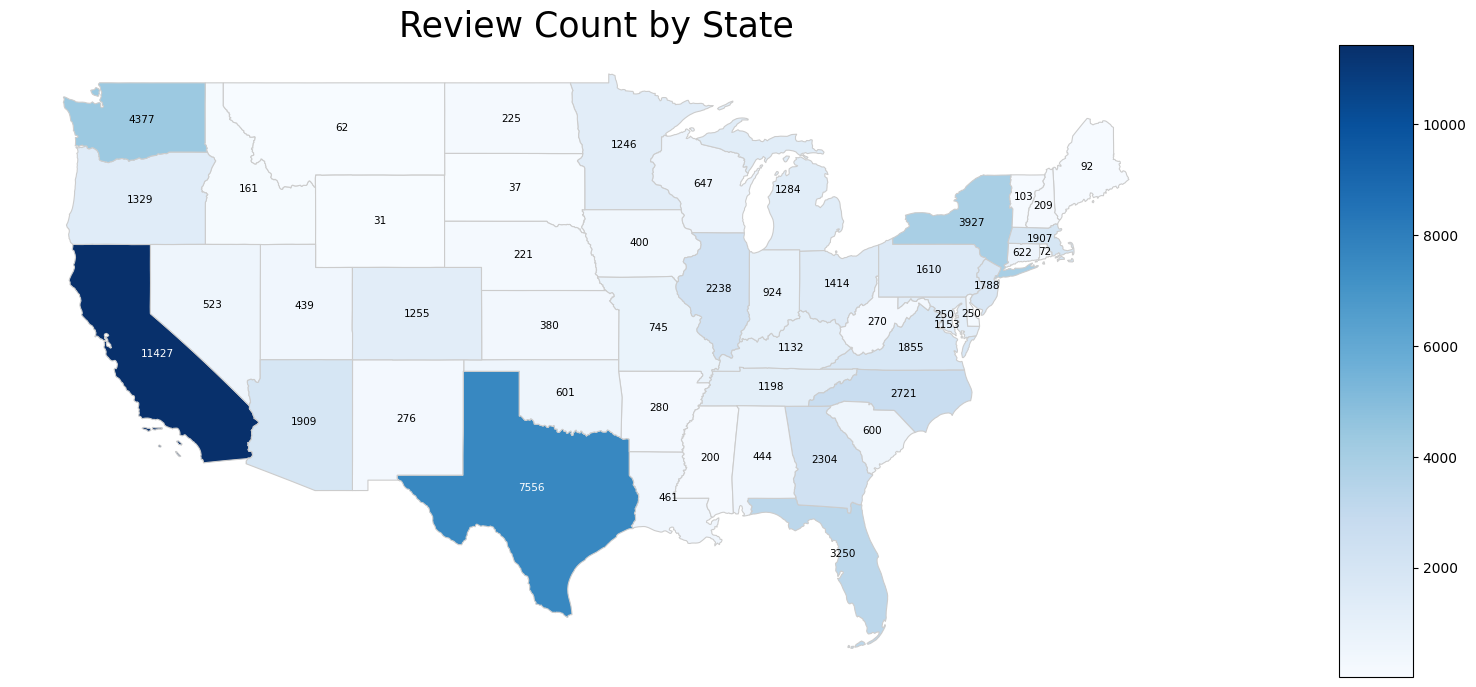

In [ ]:
# Calculate review counts per state
review_counts = df_filtered['state'].value_counts().reset_index()
review_counts.columns = ['state', 'review_count']
review_counts

# Load US states geometry
us_states = gpd.read_file('https://www2.census.gov/geo/tiger/GENZ2021/shp/cb_2021_us_state_20m.zip')

# Set the indices to the state codes for both DataFrames
us_states = us_states.set_index('STUSPS')
review_counts = review_counts.set_index('state')

# Merge the DataFrames on the indices
merged_data = us_states.join(review_counts, how="left")

# Replace NaN values with 0 for states without reviews
merged_data['review_count'] = merged_data['review_count'].fillna(0)

# Filter out Alaska and Hawaii for a focus on the contiguous US
contiguous_us = merged_data.loc[~merged_data.index.isin(['AK', 'HI', 'PR', 'GU', 'VI', 'MP', 'AS'])]

# Set the size of the figure
fig, ax = plt.subplots(1, 1, figsize=(20, 15))

# Change the colormap to a blue scheme
cmap = plt.cm.Blues

# Plot the map with the review_count column dictating the color
contiguous_us.plot(column='review_count', cmap=cmap, linewidth=0.8, edgecolor='0.8', legend=False, ax=ax)

# Remove the axis
ax.set_axis_off()

# Set the title for the map
ax.set_title('Review Count by State', fontdict={'fontsize': '25', 'fontweight' : '3'})

# Create the colorbar manually
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=contiguous_us['review_count'].min(), vmax=contiguous_us['review_count'].max()))
sm._A = []  # Array for the colorbar
plt.colorbar(sm, cax=cax)

# Define the threshold for changing text color
threshold = 7000

# Define offsets for specific states
state_offsets = {
    'DC': (0.03, 0.02),  # Adjust these values as needed
    'MD': (-0.05, -0.5)     # Adjust these values as needed
}

# Annotate the count on each state
for idx, row in contiguous_us.iterrows():
    # Only annotate states that have a review count
    if row['review_count'] > 0:
        # The centroid of a geometry is returned as a Point object, get the coordinates
        centroid = row['geometry'].centroid.coords[0]
        # Determine if the text color should be white or black based on the threshold
        text_color = 'white' if row['review_count'] > threshold else 'black'

        # Check if the state has a specific offset
        offset_x, offset_y = state_offsets.get(idx, (0, 0))

        # Apply the offsets
        xy = (centroid[0] + offset_x, centroid[1] + offset_y)

        ax.annotate(text=f"{int(row['review_count'])}",
                     xy=xy,
                     ha='center',  # Horizontal alignment
                     va='center',  # Vertical alignment
                     fontsize=7.5,  # Adjust font size for visibility
                     color=text_color)

# Show the map
plt.show()



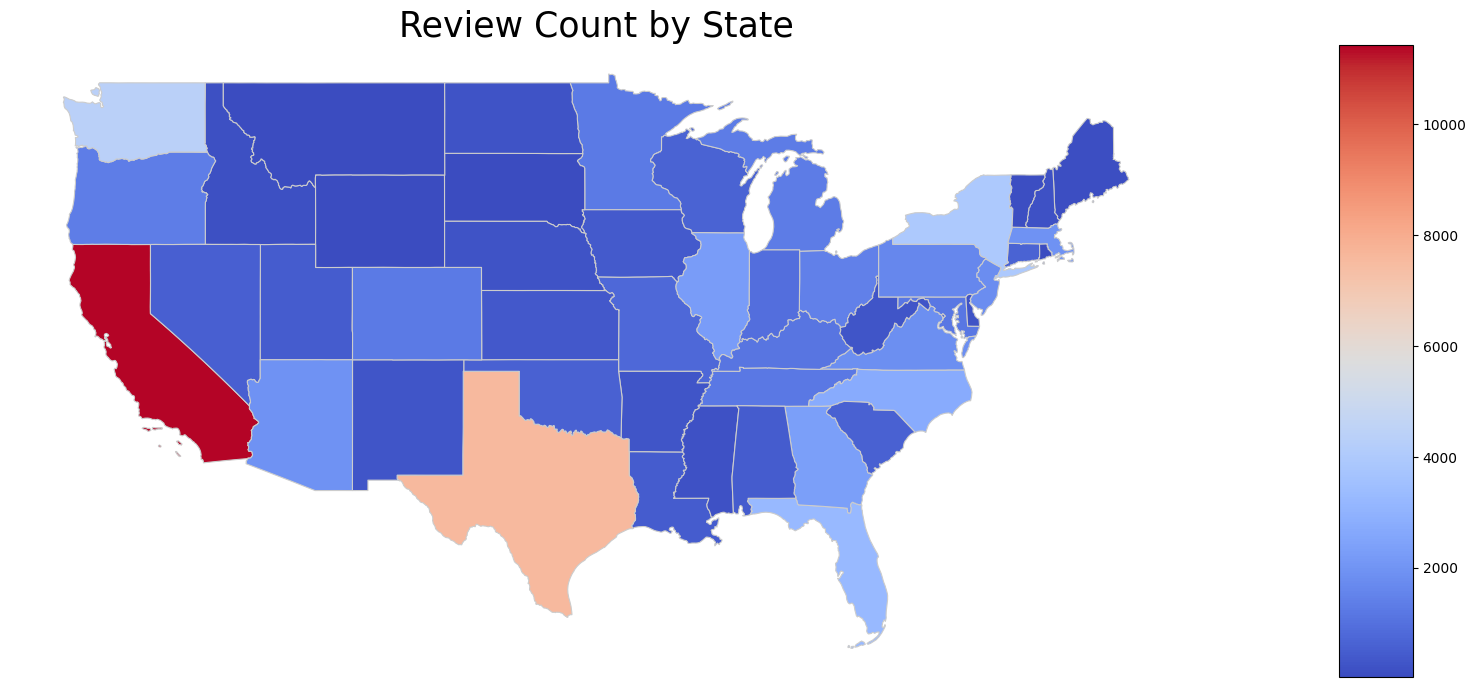

In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable


# Calculate review counts per state
review_counts = df_filtered['state'].value_counts().reset_index()
review_counts.columns = ['state', 'review_count']
review_counts

# Load US states geometry
us_states = gpd.read_file('https://www2.census.gov/geo/tiger/GENZ2021/shp/cb_2021_us_state_20m.zip')

# Set the indices to the state codes for both DataFrames
us_states = us_states.set_index('STUSPS')
review_counts = review_counts.set_index('state')

# Merge the DataFrames on the indices
merged_data = us_states.join(review_counts, how="left")

# Replace NaN values with 0 for states without reviews
merged_data['review_count'] = merged_data['review_count'].fillna(0)

# Filter out Alaska and Hawaii for a focus on the contiguous US
contiguous_us = merged_data.loc[~merged_data.index.isin(['AK', 'HI', 'PR', 'GU', 'VI', 'MP', 'AS'])]

# Set the size of the figure
fig, ax = plt.subplots(1, 1, figsize=(20, 15))

# Change the colormap to 'coolwarm' which is a diverging colormap
cmap = plt.cm.coolwarm

# Plot the map with the review_count column dictating the color
contiguous_us.plot(column='review_count', cmap=cmap, linewidth=0.8, edgecolor='0.8', legend=False, ax=ax)

# Remove the axis
ax.set_axis_off()

# Set the title for the map
ax.set_title('Review Count by State', fontdict={'fontsize': '25', 'fontweight' : '3'})

# Create the colorbar manually
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=contiguous_us['review_count'].min(), vmax=contiguous_us['review_count'].max()))
sm._A = []  # Array for the colorbar
plt.colorbar(sm, cax=cax)

# Show the map
plt.show()

In [ ]:
#Installing language detect library to keep only English reviews
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 10.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993224 sha256=754a790afbc6d806907b94936ea395887c10aca6a2564a1d5f6966bbee622e7c
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [ ]:
import langdetect
from langdetect import detect
from langdetect.lang_detect_exception import LangDetectException

def detect_english(text):
    try:
        return detect(text) == 'en'
    except LangDetectException:
        return False

df_filtered['is_english'] = df_filtered['review'].apply(detect_english)
df_filtered = df_filtered[df_filtered['is_english']]
df_filtered = df_filtered.drop(columns=['is_english'])

In [ ]:
#Checking dataframe again to find that almost 200+ reviews which were not in English were removed.
df_filtered

from google.colab import files
# Save the DataFrame to a CSV file
df_filtered.to_csv('dataset.csv', index=False)

# Download the file
files.download('dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download the necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize the WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

# Load the English stopwords
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stop words and perform lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha() and word not in stop_words]

    # Join the tokens back into a string
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

# Apply the preprocessing function to the 'review' column
df_filtered['preprocessed_review'] = df_filtered['review'].apply(preprocess_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
df_filtered

,company,title,review,pros,rating,position,employment_status,state,date,year,position_category,preprocessed_review
2,Dell Technologies,Productive and fun workplace,Lots of opportunities to make money and learn!...,NaN,4,sales,Current,TN,2023-10-30,2023,Entry Level,lot opportunity make money learn really enjoye...
3,Dell Technologies,Dell culture is in a slow decline.,I have been with Dell for 5 years working for ...,NaN,4,technical sales representative,Current,TX,2023-10-30,2023,Entry Level,dell year working commercial fed side business...
4,Dell Technologies,Great environment and people to surround yours...,What is the best part of working at the compan...,NaN,5,"business manager, data driven strategy",Former,TN,2023-10-24,2023,Managerial Level,best part working company respect autonomy giv...
6,Dell Technologies,Outdated Mentality!!!,They are currently in the process of replacing...,NaN,2,sales manager,Former,TX,2023-10-18,2023,Entry Level,currently process replacing sale rep sale team...
10,Dell Technologies,Could be great,"Fun atmosphere, great management and culture. ...",NaN,4,software sales specialist,Former,TN,2023-10-14,2023,Entry Level,fun atmosphere great management culture could ...
...,...,...,...,...,...,...,...,...,...,...,...,...
249461,Salesforce,Great job,Yes great person loved working here daily revi...,NaN,5,sales,Current,NY,2023-10-06,2023,Entry Level,yes great person loved working daily review gr...
249463,Salesforce,Ymmv,Your experience largely depends on the team yo...,NaN,4,executive assistant,Former,NY,2023-09-14,2023,Entry Level,experience largely depends team support cultur...
249465,Salesforce,It’s all about the people,"Good, smart, hardworking people who work at Sa...",NaN,5,senior director,Former,CA,2023-09-10,2023,Managerial Level,good smart hardworking people work salesforce ...
249466,Salesforce,"Overall, I did like my job and team at Salesfo...",What is the best part of working at the compan...,NaN,4,"director of systems, customer experience, digi...",Former,IL,2023-09-06,2023,Executive Level,best part working company benefit include time...


In [ ]:
from nltk import bigrams, trigrams

def generate_ngrams(tokens):
    bigrams_list = list(bigrams(tokens))
    trigrams_list = list(trigrams(tokens))
    return tokens, bigrams_list, trigrams_list

# Tokenize the preprocessed reviews
df_filtered['tokens'] = df_filtered['preprocessed_review'].apply(lambda x: x.split())

# Generate unigrams, bigrams, and trigrams
df_filtered['unigrams'], df_filtered['bigrams'], df_filtered['trigrams'] = zip(*df_filtered['tokens'].apply(generate_ngrams))

df_filtered

,company,title,review,pros,rating,position,employment_status,state,date,year,position_category,preprocessed_review,tokens,unigrams,bigrams,trigrams
2,Dell Technologies,Productive and fun workplace,Lots of opportunities to make money and learn!...,NaN,4,sales,Current,TN,2023-10-30,2023,Entry Level,lot opportunity make money learn really enjoye...,"[lot, opportunity, make, money, learn, really,...","[lot, opportunity, make, money, learn, really,...","[(lot, opportunity), (opportunity, make), (mak...","[(lot, opportunity, make), (opportunity, make,..."
3,Dell Technologies,Dell culture is in a slow decline.,I have been with Dell for 5 years working for ...,NaN,4,technical sales representative,Current,TX,2023-10-30,2023,Entry Level,dell year working commercial fed side business...,"[dell, year, working, commercial, fed, side, b...","[dell, year, working, commercial, fed, side, b...","[(dell, year), (year, working), (working, comm...","[(dell, year, working), (year, working, commer..."
4,Dell Technologies,Great environment and people to surround yours...,What is the best part of working at the compan...,NaN,5,"business manager, data driven strategy",Former,TN,2023-10-24,2023,Managerial Level,best part working company respect autonomy giv...,"[best, part, working, company, respect, autono...","[best, part, working, company, respect, autono...","[(best, part), (part, working), (working, comp...","[(best, part, working), (part, working, compan..."
6,Dell Technologies,Outdated Mentality!!!,They are currently in the process of replacing...,NaN,2,sales manager,Former,TX,2023-10-18,2023,Entry Level,currently process replacing sale rep sale team...,"[currently, process, replacing, sale, rep, sal...","[currently, process, replacing, sale, rep, sal...","[(currently, process), (process, replacing), (...","[(currently, process, replacing), (process, re..."
10,Dell Technologies,Could be great,"Fun atmosphere, great management and culture. ...",NaN,4,software sales specialist,Former,TN,2023-10-14,2023,Entry Level,fun atmosphere great management culture could ...,"[fun, atmosphere, great, management, culture, ...","[fun, atmosphere, great, management, culture, ...","[(fun, atmosphere), (atmosphere, great), (grea...","[(fun, atmosphere, great), (atmosphere, great,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249461,Salesforce,Great job,Yes great person loved working here daily revi...,NaN,5,sales,Current,NY,2023-10-06,2023,Entry Level,yes great person loved working daily review gr...,"[yes, great, person, loved, working, daily, re...","[yes, great, person, loved, working, daily, re...","[(yes, great), (great, person), (person, loved...","[(yes, great, person), (great, person, loved),..."
249463,Salesforce,Ymmv,Your experience largely depends on the team yo...,NaN,4,executive assistant,Former,NY,2023-09-14,2023,Entry Level,experience largely depends team support cultur...,"[experience, largely, depends, team, support, ...","[experience, largely, depends, team, support, ...","[(experience, largely), (largely, depends), (d...","[(experience, largely, depends), (largely, dep..."
249465,Salesforce,It’s all about the people,"Good, smart, hardworking people who work at Sa...",NaN,5,senior director,Former,CA,2023-09-10,2023,Managerial Level,good smart hardworking people work salesforce ...,"[good, smart, hardworking, people, work, sales...","[good, smart, hardworking, people, work, sales...","[(good, smart), (smart, hardworking), (hardwor...","[(good, smart, hardworking), (smart, hardworki..."
249466,Salesforce,"Overall, I did like my job and team at Salesfo...",What is the best part of working at the compan...,NaN,4,"director of systems, customer experience, digi...",Former,IL,2023-09-06,2023,Executive Level,best part working company benefit include time...,"[best, part, working, company, benefit, includ...","[best, part, working, company, benefit, includ...","[(best, part), (part, working), (working, comp...","[(best, part, wor

In [ ]:
ebv_mapping = {
    # APPLICATION
    'skill': 'APPLICATION',
    'expertise': 'APPLICATION',
    'knowledge': 'APPLICATION',
    'teach': 'APPLICATION',
    'application': 'APPLICATION',
    'customer_oriented': 'APPLICATION',
    'acceptance': 'APPLICATION',
    'belonging': 'APPLICATION',
    'contribution': 'APPLICATION',
    'contribute': 'APPLICATION',
    'mentoring': 'APPLICATION',
    'mentor': 'APPLICATION',
    'volunteer': 'APPLICATION',
    'coach': 'APPLICATION',
    'customer oriented': 'APPLICATION',  # bigram
    'contribute knowledge': 'APPLICATION',  # bigram

    # BRAND IMAGE
    'perception': 'BRAND IMAGE',
    'brand': 'BRAND IMAGE',
    'brand_image': 'BRAND IMAGE',
    'market': 'BRAND IMAGE',
    'reputation': 'BRAND IMAGE',
    'prestige': 'BRAND IMAGE',
    'visibility': 'BRAND IMAGE',
    'positive brand perception': 'BRAND IMAGE',  # bigram
    'brand reputation': 'BRAND IMAGE',  # trigram

    # DEVELOPMENT
    'self confidence': 'DEVELOPMENT', #bigram
    'career enhancing': 'DEVELOPMENT', #bigram
    'experience': 'DEVELOPMENT',
    'springboard': 'DEVELOPMENT',
    'future': 'DEVELOPMENT',
    'recognition': 'DEVELOPMENT',
    'appreciation': 'DEVELOPMENT',
    'opportunities': 'DEVELOPMENT',
    'growth': 'DEVELOPMENT',
    'training': 'DEVELOPMENT',
    'mentorship': 'DEVELOPMENT',
    'advancement': 'DEVELOPMENT',
    'opportunity': 'DEVELOPMENT',
    'career': 'DEVELOPMENT',
    'develop': 'DEVELOPMENT',
    'learn': 'DEVELOPMENT',
    'promote': 'DEVELOPMENT',
    'promotion': 'DEVELOPMENT',
    'career opportunity': 'DEVELOPMENT',  # bigram
    'growth opportunities': 'DEVELOPMENT',  # bigram
    'career opportunity': 'DEVELOPMENT',  # bigram
    'professional development': 'DEVELOPMENT',  # bigram

    # ECONOMIC
    'compensation': 'ECONOMIC',
    'benefit': 'ECONOMIC',
    'salary': 'ECONOMIC',
    'job security': 'ECONOMIC', #bigram
    'security': 'ECONOMIC',
    'perks': 'ECONOMIC',
    'finance': 'ECONOMIC',
    'pay': 'ECONOMIC',
    'bonus': 'ECONOMIC',
    'incentive': 'ECONOMIC',
    'commission': 'ECONOMIC',
    'pension': 'ECONOMIC',
    'dividend': 'ECONOMIC',
    'wage': 'ECONOMIC',
    'raise': 'ECONOMIC',
    '401k': 'ECONOMIC',
    'reward': 'ECONOMIC',
    'competitive salary benefits': 'ECONOMIC',  # bigram
    'job security perks': 'ECONOMIC',  # bigram


    # INTEREST
    'innovation': 'INTEREST',
    'novel': 'INTEREST',
    'creativity': 'INTEREST',
    'high quality': 'INTEREST', #bigram
    'exciting': 'INTEREST',
    'excite': 'INTEREST',
    'openness': 'INTEREST',
    'achievable': 'INTEREST',
    'challenge': 'INTEREST',
    'environment': 'INTEREST',
    'projects': 'INTEREST',
    'technology': 'INTEREST',
    'morale': 'INTEREST',
    'workspace': 'INTEREST',
    'unique': 'INTEREST',
    'creative work environment': 'INTEREST',  # bigram
    'innovation creativity': 'INTEREST',  # bigram

    # MANAGEMENT
    'assessment': 'MANAGEMENT',
    'leadership': 'MANAGEMENT',
    'leaders': 'MANAGEMENT',
    'vision': 'MANAGEMENT',
    'qualities': 'MANAGEMENT',
    'superiors': 'MANAGEMENT',
    'manager': 'MANAGEMENT',
    'competence': 'MANAGEMENT',
    'motivate': 'MANAGEMENT',
    'inspire': 'MANAGEMENT',
    'politics': 'MANAGEMENT',
    'guidance': 'MANAGEMENT',
    'direction': 'MANAGEMENT',
    'boss': 'MANAGEMENT',
    'supervisor': 'MANAGEMENT',
    'strategy': 'MANAGEMENT',
    'leadership qualities': 'MANAGEMENT',  # bigram
    'management and vision': 'MANAGEMENT',  # bigram

    # SOCIAL
    'relationship': 'SOCIAL',
    'support': 'SOCIAL',
    'colleague': 'SOCIAL',
    'relation': 'SOCIAL',
    'encourage': 'SOCIAL',
    'fun': 'SOCIAL',
    'care': 'SOCIAL',
    'community': 'SOCIAL',
    'happy': 'SOCIAL',
    'culture': 'SOCIAL',
    'team': 'SOCIAL',
    'workplace': 'SOCIAL',
    'teamwork': 'SOCIAL',
    'networking': 'SOCIAL',
    'atmosphere': 'SOCIAL',
    'supportive colleagues': 'SOCIAL',  # bigram
    'work culture': 'SOCIAL',  # bigram

    # WORKLIFE BALANCE
    'balance': 'WORKLIFE BALANCE',
    'family': 'WORKLIFE BALANCE',
    'leisure': 'WORKLIFE BALANCE',
    'long_hour': 'WORKLIFE BALANCE',
    'weekend': 'WORKLIFE BALANCE',
    'overtime': 'WORKLIFE BALANCE',
    'flexibility': 'WORKLIFE BALANCE',
    'life': 'WORKLIFE BALANCE',
    'time_off': 'WORKLIFE BALANCE',
    'remote': 'WORKLIFE BALANCE',
    'wellbeing': 'WORKLIFE BALANCE',
    'well being': 'WORKLIFE BALANCE',
    'work life balance': 'WORKLIFE BALANCE',  # bigram
    'flexible working hours': 'WORKLIFE BALANCE',  # bigram
    'flexible work hours': 'WORKLIFE BALANCE'  # bigram
}

In [ ]:
from collections import Counter
import pandas as pd

# Flatten the lists of n-grams
unigrams = [word for review in df_filtered['unigrams'] for word in review]
bigrams = [' '.join(bigram) for review in df_filtered['bigrams'] for bigram in review]
trigrams = [' '.join(trigram) for review in df_filtered['trigrams'] for trigram in review]

# Count the occurrences of each n-gram
unigram_counts = Counter(unigrams)
bigram_counts = Counter(bigrams)
trigram_counts = Counter(trigrams)

In [ ]:
bigram_counts

Counter({'lot opportunity': 549,
         'opportunity make': 57,
         'make money': 151,
         'money learn': 2,
         'learn really': 10,
         'really enjoyed': 498,
         'enjoyed past': 2,
         'past couple': 9,
         'couple year': 105,
         'year grown': 6,
         'grown significantly': 2,
         'significantly peer': 1,
         'peer recognize': 1,
         'recognize time': 1,
         'dell year': 22,
         'year working': 155,
         'working commercial': 2,
         'commercial fed': 1,
         'fed side': 1,
         'side business': 31,
         'business culture': 15,
         'culture declined': 2,
         'declined slowly': 1,
         'slowly last': 1,
         'last two': 30,
         'two year': 207,
         'year return': 2,
         'return office': 2,
         'office pizza': 1,
         'pizza party': 13,
         'party talk': 1,
         'talk moving': 1,
         'moving sale': 4,
         'sale online': 4,
         'on

In [ ]:
def map_ngrams_to_ebvs(ngram_counts, ebv_mapping):
    ebv_counts = Counter()
    for ngram, count in ngram_counts.items():
        ebv = ebv_mapping.get(ngram)
        if ebv:
            ebv_counts[ebv] += count
    return ebv_counts

# Map n-grams to EBVs and summate their frequencies
unigram_ebv_counts = map_ngrams_to_ebvs(unigram_counts, ebv_mapping)
bigram_ebv_counts = map_ngrams_to_ebvs(bigram_counts, ebv_mapping)
trigram_ebv_counts = map_ngrams_to_ebvs(trigram_counts, ebv_mapping)

In [ ]:
from collections import Counter

# Extract bigrams and trigrams from the reviews
review_bigrams = [' '.join(bigram) for review in df_filtered['bigrams'] for bigram in review]
review_trigrams = [' '.join(trigram) for review in df_filtered['trigrams'] for trigram in review]

# Count the occurrences of each bigram and trigram
bigram_counts = Counter(review_bigrams)
trigram_counts = Counter(review_trigrams)

# Find which bigrams and trigrams in the reviews are in the EBV mapping and get their counts
captured_bigrams = {bigram: (ebv_mapping[bigram], count) for bigram, count in bigram_counts.items() if bigram in ebv_mapping and ' ' in bigram}
captured_trigrams = {trigram: (ebv_mapping[trigram], count) for trigram, count in trigram_counts.items() if trigram in ebv_mapping and ' ' in trigram and trigram.count(' ') == 2}

In [ ]:
# Convert the dictionaries to DataFrames
df_captured_bigrams = pd.DataFrame(list(captured_bigrams.items()), columns=['Bigram', 'EBV_Count'])
df_captured_trigrams = pd.DataFrame(list(captured_trigrams.items()), columns=['Trigram', 'EBV_Count'])

# Split the EBV and Count into separate columns
df_captured_bigrams[['EBV', 'Count']] = pd.DataFrame(df_captured_bigrams['EBV_Count'].tolist(), index=df_captured_bigrams.index)
df_captured_trigrams[['EBV', 'Count']] = pd.DataFrame(df_captured_trigrams['EBV_Count'].tolist(), index=df_captured_trigrams.index)

# Drop the EBV_Count column
df_captured_bigrams = df_captured_bigrams.drop('EBV_Count', axis=1)
df_captured_trigrams = df_captured_trigrams.drop('EBV_Count', axis=1)

In [ ]:
print("Captured Bigrams:")
print(df_captured_bigrams)
print("\nCaptured Trigrams:")
print(df_captured_trigrams)

Captured Bigrams:
                      Bigram               EBV  Count
0               work culture            SOCIAL    832
1               job security          ECONOMIC    709
2          customer oriented       APPLICATION     34
3         career opportunity       DEVELOPMENT     86
4               high quality          INTEREST     41
5   professional development       DEVELOPMENT     64
6            self confidence       DEVELOPMENT      4
7       contribute knowledge       APPLICATION      1
8      innovation creativity          INTEREST     11
9           brand reputation       BRAND IMAGE      3
10                well being  WORKLIFE BALANCE      1

Captured Trigrams:
                     Trigram               EBV  Count
0          work life balance  WORKLIFE BALANCE   1664
1  creative work environment          INTEREST      2


In [ ]:
from collections import Counter

def map_ngrams_to_ebv(ngrams):
    ebv_terms = [ebv_mapping.get(ngram) for ngram in ngrams if ngram in ebv_mapping]
    return ebv_terms

def flatten_ngrams(row):
    return row['unigrams'] + ['_'.join(bigram) for bigram in row['bigrams']] + ['_'.join(trigram) for trigram in row['trigrams']]

# Flatten n-grams and map to EBV categories
df_filtered['all_ngrams'] = df_filtered.apply(flatten_ngrams, axis=1)
df_filtered['ebv_terms'] = df_filtered['all_ngrams'].apply(map_ngrams_to_ebv)

# Count occurrences of each EBV category
df_filtered['ebv_counts'] = df_filtered['ebv_terms'].apply(lambda x: Counter(x))

# If you want to see the total counts across all rows
total_ebv_counts = Counter()
df_filtered['ebv_counts'].apply(lambda x: total_ebv_counts.update(x))
print(total_ebv_counts)

Counter({'SOCIAL': 38659, 'DEVELOPMENT': 38081, 'ECONOMIC': 23145, 'MANAGEMENT': 17041, 'INTEREST': 16288, 'WORKLIFE BALANCE': 13307, 'APPLICATION': 7494, 'BRAND IMAGE': 1216})


In [ ]:
# Add a column for the year
df_filtered['year'] = pd.to_datetime(df_filtered['date']).dt.year

# Define a function to calculate the relative importance of EBVs by year
def calculate_relative_importance(df, ebv_counts):
    relative_importance = {}
    for year in sorted(df['year'].unique()):
        yearly_data = df[df['year'] == year]
        yearly_counts = Counter()
        for _, row in yearly_data.iterrows():
            for ebv in ebv_counts.keys():
                yearly_counts[ebv] += row['ebv_terms'].count(ebv)
        total = sum(yearly_counts.values())
        if total > 0:
            relative_importance[year] = {ebv: count / total for ebv, count in yearly_counts.items()}
        else:
            relative_importance[year] = {ebv: 0 for ebv in yearly_counts.keys()}
    return relative_importance

# Calculate the relative importance of each EBV by year
relative_importance = calculate_relative_importance(df_filtered, unigram_ebv_counts + bigram_ebv_counts + trigram_ebv_counts)

In [ ]:
relative_importance

{2012: {'DEVELOPMENT': 0.25577812018489987,
  'SOCIAL': 0.2573189522342065,
  'ECONOMIC': 0.11358133392031697,
  'INTEREST': 0.12018489984591679,
  'MANAGEMENT': 0.09949372661237069,
  'WORKLIFE BALANCE': 0.07440017609509135,
  'BRAND IMAGE': 0.012326656394453005,
  'APPLICATION': 0.06691613471274488},
 2013: {'DEVELOPMENT': 0.24009415457041977,
  'SOCIAL': 0.26258663528180987,
  'ECONOMIC': 0.1035700274617497,
  'INTEREST': 0.12488557604289263,
  'MANAGEMENT': 0.10710082385249117,
  'WORKLIFE BALANCE': 0.07767752059631228,
  'BRAND IMAGE': 0.010461618935530274,
  'APPLICATION': 0.0736236432587943},
 2014: {'DEVELOPMENT': 0.24018163966617576,
  'SOCIAL': 0.2691458026509573,
  'ECONOMIC': 0.0976926853215513,
  'INTEREST': 0.13156602847324497,
  'MANAGEMENT': 0.09891998036327933,
  'WORKLIFE BALANCE': 0.0780559646539028,
  'BRAND IMAGE': 0.008836524300441826,
  'APPLICATION': 0.07560137457044673},
 2015: {'DEVELOPMENT': 0.25253419938982385,
  'SOCIAL': 0.2643440606239543,
  'ECONOMIC': 0

In [ ]:
df_filtered

,company,title,review,pros,rating,position,employment_status,state,date,year,position_category,preprocessed_review,tokens,unigrams,bigrams,trigrams,all_ngrams,ebv_terms,ebv_counts
2,Dell Technologies,Productive and fun workplace,Lots of opportunities to make money and learn!...,NaN,4,sales,Current,TN,2023-10-30,2023,Entry Level,lot opportunity make money learn really enjoye...,"[lot, opportunity, make, money, learn, really,...","[lot, opportunity, make, money, learn, really,...","[(lot, opportunity), (opportunity, make), (mak...","[(lot, opportunity, make), (opportunity, make,...","[lot, opportunity, make, money, learn, really,...","[DEVELOPMENT, DEVELOPMENT]",{'DEVELOPMENT': 2}
3,Dell Technologies,Dell culture is in a slow decline.,I have been with Dell for 5 years working for ...,NaN,4,technical sales representative,Current,TX,2023-10-30,2023,Entry Level,dell year working commercial fed side business...,"[dell, year, working, commercial, fed, side, b...","[dell, year, working, commercial, fed, side, b...","[(dell, year), (year, working), (working, comm...","[(dell, year, working), (year, working, commer...","[dell, year, working, commercial, fed, side, b...","[SOCIAL, DEVELOPMENT, DEVELOPMENT]","{'SOCIAL': 1, 'DEVELOPMENT': 2}"
4,Dell Technologies,Great environment and people to surround yours...,What is the best part of working at the compan...,NaN,5,"business manager, data driven strategy",Former,TN,2023-10-24,2023,Managerial Level,best part working company respect autonomy giv...,"[best, part, working, company, respect, autono...","[best, part, working, company, respect, autono...","[(best, part), (part, working), (working, comp...","[(best, part, working), (part, working, compan...","[best, part, working, company, respect, autono...","[ECONOMIC, INTEREST, SOCIAL, SOCIAL]","{'ECONOMIC': 1, 'INTEREST': 1, 'SOCIAL': 2}"
6,Dell Technologies,Outdated Mentality!!!,They are currently in the process of replacing...,NaN,2,sales manager,Former,TX,2023-10-18,2023,Entry Level,currently process replacing sale rep sale team...,"[currently, process, replacing, sale, rep, sal...","[currently, process, replacing, sale, rep, sal...","[(currently, process), (process, replacing), (...","[(currently, process, replacing), (process, re...","[currently, process, replacing, sale, rep, sal...","[SOCIAL, MANAGEMENT, SOCIAL, MANAGEMENT]","{'SOCIAL': 2, 'MANAGEMENT': 2}"
10,Dell Technologies,Could be great,"Fun atmosphere, great management and culture. ...",NaN,4,software sales specialist,Former,TN,2023-10-14,2023,Entry Level,fun atmosphere great management culture could ...,"[fun, atmosphere, great, management, culture, ...","[fun, atmosphere, great, management, culture, ...","[(fun, atmosphere), (atmosphere, great), (grea...","[(fun, atmosphere, great), (atmosphere, great,...","[fun, atmosphere, great, management, culture, ...","[SOCIAL, SOCIAL, SOCIAL, ECONOMIC, ECONOMIC, E...","{'SOCIAL': 3, 'ECONOMIC': 4}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249461,Salesforce,Great job,Yes great person loved working here daily revi...,NaN,5,sales,Current,NY,2023-10-06,2023,Entry Level,yes great person loved working daily review gr...,"[yes, great, person, loved, working, daily, re...","[yes, great, person, loved, working, daily, re...","[(yes, great), (great, person), (person, loved...","[(yes, great, person), (great, person, loved),...","[yes, great, person, loved, working, daily, re...","[DEVELOPMENT, ECONOMIC, ECONOMIC, MANAGEMENT]","{'DEVELOPMENT': 1, 'ECONOMIC': 2, 'MANAGEMENT'..."
249463,Salesforce,Ymmv,Your experience largely depends on the team yo...,NaN,4,executive assistant,Former,NY,2023-09-14,2023,Entry Level,experience largely depends team support cultur...,"[experience, largely, depends, team, support, ...","[experience, largely, depends, team, support, ...","[(experience, largely), (largely, depends), (d...","[(experience, largely, depends), (largely, dep...","[experience, largely, depends, team, suppor

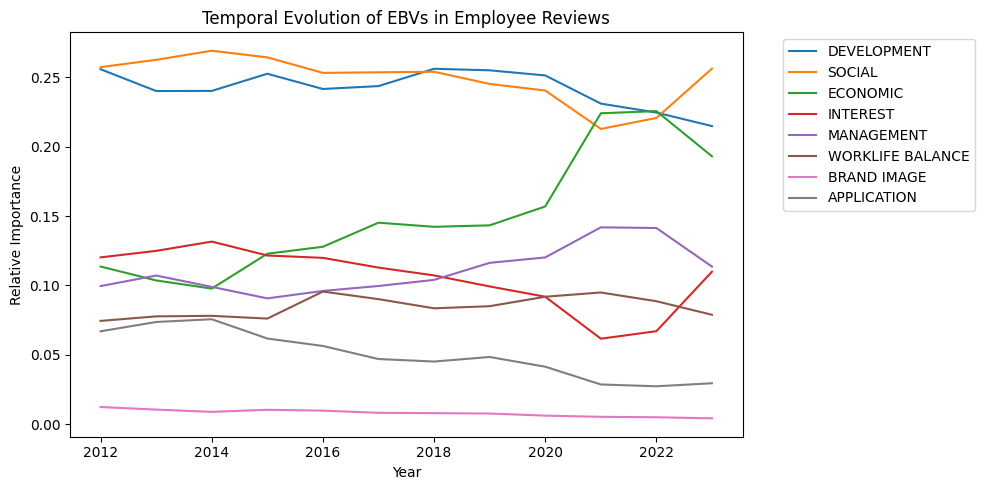

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the relative_importance dictionary to a DataFrame
df_relative_importance = pd.DataFrame(relative_importance).T

# Sort the DataFrame based on the year
df_relative_importance = df_relative_importance.sort_index()

# Plot the data
plt.figure(figsize=(10, 5))
for column in df_relative_importance.columns:
    plt.plot(df_relative_importance.index, df_relative_importance[column], label=column)

plt.xlabel('Year')
plt.ylabel('Relative Importance')
plt.title('Temporal Evolution of EBVs in Employee Reviews')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

TF-IDF Matrix

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Combine all preprocessed reviews into a single list
corpus = df_filtered['preprocessed_review'].tolist()

# Initialize the vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the corpus
X = vectorizer.fit_transform(corpus)

# Get feature names to use as DataFrame column headers
feature_names = vectorizer.get_feature_names_out()

In [ ]:
def map_ngrams_to_ebv_tfidf(tokens, ebv_mapping, feature_names, X):
    ebv_counts = defaultdict(float)
    for token in tokens:
        ebv = ebv_mapping.get(token)
        if ebv:
            # Find the index of the token in the feature_names
            token_idx = np.where(feature_names == token)[0]
            if token_idx.size > 0:
                # Sum the TF-IDF scores for this token across all documents
                ebv_counts[ebv] += X[:, token_idx].sum()
    return ebv_counts

In [ ]:
from collections import defaultdict
import numpy as np

def map_ngrams_to_ebv_tfidf(tokens, ebv_mapping, feature_names, X):
    ebv_counts = defaultdict(float)
    for token in tokens:
        ebv = ebv_mapping.get(token)
        if ebv:
            # Find the index of the token in the feature_names
            token_idx = np.where(feature_names == token)[0]
            if token_idx.size > 0:
                # Sum the TF-IDF scores for this token across all documents
                ebv_counts[ebv] += X[:, token_idx].sum()
    return ebv_counts

# Now you can apply the function to your DataFrame
df_filtered['ebv_tfidf'] = df_filtered['tokens'].apply(lambda tokens: map_ngrams_to_ebv_tfidf(tokens, ebv_mapping, feature_names, X))

In [ ]:
from collections import defaultdict

# Initialize a defaultdict to hold the total counts for each EBV category
ebv_tfidf_total = defaultdict(float)

# Iterate over the 'ebv_tfidf' column and sum the counts for each EBV category
for ebv_counts in df_filtered['ebv_tfidf']:
    for ebv, count in ebv_counts.items():
        ebv_tfidf_total[ebv] += count

# Now, ebv_tfidf_total holds the summed TF-IDF scores for each EBV category across all reviews

In [ ]:
ebv_tfidf_total

defaultdict(float,
            {'DEVELOPMENT': 28305902.62239205,
             'SOCIAL': 32026304.54912886,
             'ECONOMIC': 17114188.89641685,
             'INTEREST': 13674236.654823827,
             'MANAGEMENT': 14036161.600301674,
             'WORKLIFE BALANCE': 6433272.992182052,
             'BRAND IMAGE': 114878.67371379318,
             'APPLICATION': 2677838.627192167})

In [ ]:
# Convert the Counter objects to DataFrames
df_unigram_ebv = pd.DataFrame(list(unigram_ebv_counts.items()), columns=['EBV', 'Unigram Frequency'])
df_bigram_ebv = pd.DataFrame(list(bigram_ebv_counts.items()), columns=['EBV', 'Bigram Frequency'])
df_trigram_ebv = pd.DataFrame(list(trigram_ebv_counts.items()), columns=['EBV', 'Trigram Frequency'])

# Merge the DataFrames on the EBV column
df_ebv_frequencies = df_unigram_ebv.merge(df_bigram_ebv, on='EBV', how='outer').merge(df_trigram_ebv, on='EBV', how='outer')

# Fill NaN values with 0
df_ebv_frequencies = df_ebv_frequencies.fillna(0)
df_ebv_frequencies

,EBV,Unigram Frequency,Bigram Frequency,Trigram Frequency
0,DEVELOPMENT,38081,154.0,0.0
1,SOCIAL,38659,832.0,0.0
2,ECONOMIC,23145,709.0,0.0
3,INTEREST,16288,52.0,2.0
4,MANAGEMENT,17041,0.0,0.0
5,WORKLIFE BALANCE,12596,1.0,1664.0
6,BRAND IMAGE,1216,3.0,0.0
7,APPLICATION,7460,35.0,0.0


In [ ]:
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt

# Step 1: Add a column for the year
df_filtered['year'] = pd.to_datetime(df_filtered['date']).dt.year

# Step 2: Define a function to calculate the relative importance of EBVs by year
def calculate_relative_importance_tfidf(df, ebv_mapping):
    relative_importance = {}
    for year in sorted(df['year'].unique()):
        yearly_data = df[df['year'] == year]
        yearly_ebv_tfidf = defaultdict(float)
        for _, row in yearly_data.iterrows():
            for ebv, tfidf_score in row['ebv_tfidf'].items():
                yearly_ebv_tfidf[ebv] += tfidf_score
        total_tfidf = sum(yearly_ebv_tfidf.values())
        if total_tfidf > 0:
            relative_importance[year] = {ebv: tfidf_score / total_tfidf for ebv, tfidf_score in yearly_ebv_tfidf.items()}
        else:
            relative_importance[year] = {ebv: 0 for ebv in ebv_mapping.values()}
    return relative_importance

# Step 3: Calculate the relative importance of each EBV by year
relative_importance_tfidf = calculate_relative_importance_tfidf(df_filtered, ebv_mapping)

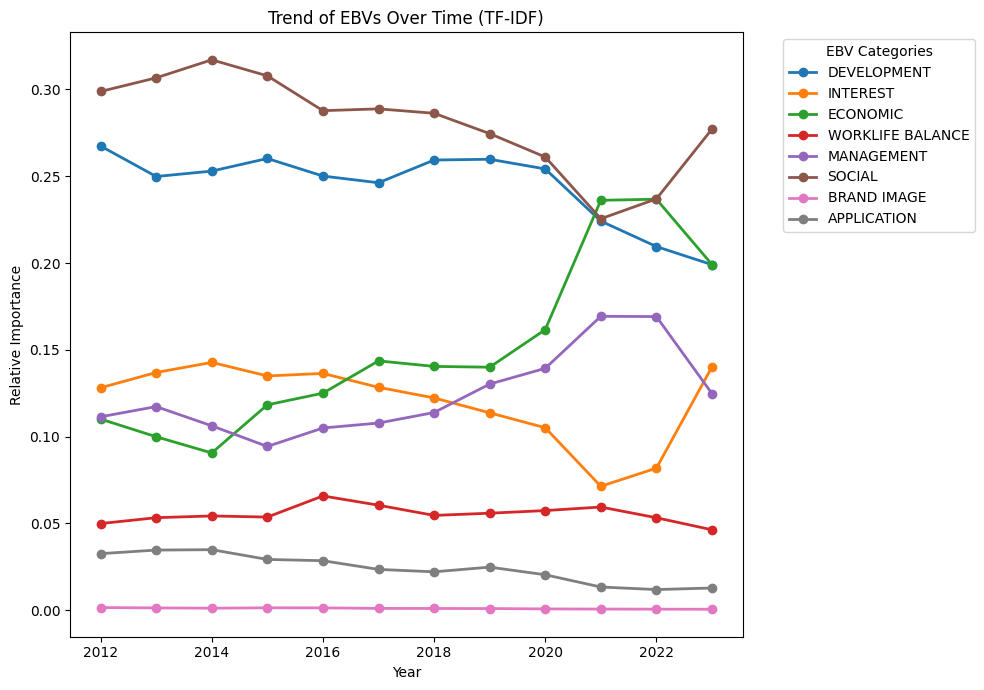

In [ ]:
# Convert the DataFrame for plotting
df_plot_line = pd.DataFrame(relative_importance_tfidf).T

# Plot line chart for each EBV category
ax = df_plot_line.plot(kind='line', marker='o', figsize=(10, 7), linewidth=2)

# Adding title and labels
plt.title('Trend of EBVs Over Time (TF-IDF)')
plt.xlabel('Year')
plt.ylabel('Relative Importance')

# Adding legend
plt.legend(title='EBV Categories', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.show()

In [ ]:
df_filtered

,company,title,review,pros,rating,position,employment_status,state,date,year,position_category,preprocessed_review,tokens,unigrams,bigrams,trigrams,all_ngrams,ebv_terms,ebv_counts,ebv_tfidf
2,Dell Technologies,Productive and fun workplace,Lots of opportunities to make money and learn!...,NaN,4,sales,Current,TN,2023-10-30,2023,Entry Level,lot opportunity make money learn really enjoye...,"[lot, opportunity, make, money, learn, really,...","[lot, opportunity, make, money, learn, really,...","[(lot, opportunity), (opportunity, make), (mak...","[(lot, opportunity, make), (opportunity, make,...","[lot, opportunity, make, money, learn, really,...","[DEVELOPMENT, DEVELOPMENT]",{'DEVELOPMENT': 2},{'DEVELOPMENT': 1857.2337115832242}
3,Dell Technologies,Dell culture is in a slow decline.,I have been with Dell for 5 years working for ...,NaN,4,technical sales representative,Current,TX,2023-10-30,2023,Entry Level,dell year working commercial fed side business...,"[dell, year, working, commercial, fed, side, b...","[dell, year, working, commercial, fed, side, b...","[(dell, year), (year, working), (working, comm...","[(dell, year, working), (year, working, commer...","[dell, year, working, commercial, fed, side, b...","[SOCIAL, DEVELOPMENT, DEVELOPMENT]","{'SOCIAL': 1, 'DEVELOPMENT': 2}","{'SOCIAL': 937.756986849994, 'DEVELOPMENT': 11..."
4,Dell Technologies,Great environment and people to surround yours...,What is the best part of working at the compan...,NaN,5,"business manager, data driven strategy",Former,TN,2023-10-24,2023,Managerial Level,best part working company respect autonomy giv...,"[best, part, working, company, respect, autono...","[best, part, working, company, respect, autono...","[(best, part), (part, working), (working, comp...","[(best, part, working), (part, working, compan...","[best, part, working, company, respect, autono...","[ECONOMIC, INTEREST, SOCIAL, SOCIAL]","{'ECONOMIC': 1, 'INTEREST': 1, 'SOCIAL': 2}","{'ECONOMIC': 177.6626679884073, 'INTEREST': 11..."
6,Dell Technologies,Outdated Mentality!!!,They are currently in the process of replacing...,NaN,2,sales manager,Former,TX,2023-10-18,2023,Entry Level,currently process replacing sale rep sale team...,"[currently, process, replacing, sale, rep, sal...","[currently, process, replacing, sale, rep, sal...","[(currently, process), (process, replacing), (...","[(currently, process, replacing), (process, re...","[currently, process, replacing, sale, rep, sal...","[SOCIAL, MANAGEMENT, SOCIAL, MANAGEMENT]","{'SOCIAL': 2, 'MANAGEMENT': 2}","{'SOCIAL': 2393.540765258086, 'MANAGEMENT': 49..."
10,Dell Technologies,Could be great,"Fun atmosphere, great management and culture. ...",NaN,4,software sales specialist,Former,TN,2023-10-14,2023,Entry Level,fun atmosphere great management culture could ...,"[fun, atmosphere, great, management, culture, ...","[fun, atmosphere, great, management, culture, ...","[(fun, atmosphere), (atmosphere, great), (grea...","[(fun, atmosphere, great), (atmosphere, great,...","[fun, atmosphere, great, management, culture, ...","[SOCIAL, SOCIAL, SOCIAL, ECONOMIC, ECONOMIC, E...","{'SOCIAL': 3, 'ECONOMIC': 4}","{'SOCIAL': 2281.6658142919837, 'ECONOMIC': 236..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249461,Salesforce,Great job,Yes great person loved working here daily revi...,NaN,5,sales,Current,NY,2023-10-06,2023,Entry Level,yes great person loved working daily review gr...,"[yes, great, person, loved, working, daily, re...","[yes, great, person, loved, working, daily, re...","[(yes, great), (great, person), (person, loved...","[(yes, great, person), (great, person, loved),...","[yes, great, person, loved, working, daily, re...","[DEVELOPMENT, ECONOMIC, ECONOMIC, MANAGEMENT]","{'DEVELOPMENT': 1, 'ECONOMIC': 2, 'MANAGEMENT'...","{'DEVELOPMENT': 639.0526283792624, 'ECONOMIC':..."
249463,Salesforce,Ymmv,Your experience largely depends on the team yo...,NaN,4,executive assistant,Former,NY,2023-09-14,2023,Entr

In [ ]:
df_relative_importance

,DEVELOPMENT,SOCIAL,ECONOMIC,INTEREST,MANAGEMENT,WORKLIFE BALANCE,BRAND IMAGE,APPLICATION
2012,0.256004,0.257325,0.113241,0.120071,0.099581,0.074466,0.012338,0.066975
2013,0.240126,0.262490,0.103584,0.124902,0.107115,0.077688,0.010463,0.073633
2014,0.240059,0.269146,0.097815,0.131566,0.098920,0.078056,0.008837,0.075601
2015,0.252534,0.264344,0.122823,0.121543,0.090641,0.076075,0.010334,0.061707
2016,0.241565,0.253171,0.127845,0.119838,0.095996,0.095547,0.009717,0.056320
2017,0.243643,0.253597,0.145199,0.112830,0.099573,0.090080,0.008155,0.046922
2018,0.256129,0.253989,0.142225,0.107195,0.103967,0.083478,0.007905,0.045112
2019,0.255025,0.245191,0.143276,0.099241,0.116234,0.085008,0.007634,0.048391
2020,0.251318,0.240460,0.156897,0.091825,0.120151,0.091825,0.006137,0.041388
2021,0.231034,0.212766,0.224049,0.061573,0.141844,0.094885,0.005265,0.028584


**THE END**